# KNN（K Nearest Neighbors）

## 1.概述

- KNN（K邻近投票算法）
- 直接计算出所有点到样本测试点的距离，选出前K个距离最小的点，少数服从多数地决定测试点的标签
- 优点：算法简单、思路简单；无需参数估计、无需训练
- 缺点：只适用于每类样本数值均衡的数据
- 能力：多分类

## 2.原理

- 选定Iris数据集作为计算样例，取K=7、欧式距离、30%测试集、70%训练集、随机种子0

- 步骤
- 1.对每个特征值采用数据归一化。采用min-max归一化方法，公式为（X-Min）/(Max-Min)
- 2.对于第一个测试样本来说，计算其到训练集中所有样本的欧式距离
- 3.选择最小的前K个距离，进行投票，按照少数服从多数得到这个样本的预测标签
- 4.计算下一个测试样本的标签，直到做完全部预测

###### 2.1 手动计算详见excel表格：Iris-count.xlsx

## 3.简单调包
- 选定Iris数据集作为计算样例，欧式距离、30%测试集、70%训练集、随机种子0
- 这里使用了十折交叉验证找到了最好的K=7

In [1]:
#导入包
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import operator

In [2]:
#引入数据集
iriis = datasets.load_iris()
x= iriis.data
y= iriis.target

#数据集归一（线性归一化）
x= (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)) 
#axis=0表示取列的最大值或者最小值

#拆分训练集和测试集
split = 0.7
#trianset : testset = 7:3

np.random.seed(0) #固定随机结果
train_indices = np.random.choice(len(x),round(len(x) * split),replace=False) 
test_indices = np.array(list(set(range(len(x))) - set(train_indices)))

In [3]:
train_indices = sorted(train_indices)
test_indices =sorted(test_indices)
train_x = x[train_indices]
test_x = x[test_indices]
train_y = y[train_indices]
test_y = y[test_indices]
print(train_indices)
print(test_indices)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 22, 24, 26, 27, 30, 33, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 56, 59, 60, 61, 62, 63, 64, 66, 68, 69, 71, 73, 76, 78, 80, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 135, 137, 139, 141, 143, 144, 146, 147, 148, 149]
[0, 9, 14, 19, 21, 23, 25, 28, 29, 31, 32, 34, 35, 36, 39, 47, 49, 55, 57, 58, 65, 67, 70, 72, 74, 75, 77, 79, 81, 82, 87, 88, 99, 103, 115, 117, 118, 122, 130, 131, 136, 138, 140, 142, 145]


In [4]:
pd.DataFrame(train_x).head(10)
#与excel的计算结果一致

,0,1,2,3
0,0.166667,0.416667,0.067797,0.041667
1,0.111111,0.500000,0.050847,0.041667
2,0.083333,0.458333,0.084746,0.041667
3,0.194444,0.666667,0.067797,0.041667
4,0.305556,0.791667,0.118644,0.125000
5,0.083333,0.583333,0.067797,0.083333
6,0.194444,0.583333,0.084746,0.041667
7,0.027778,0.375000,0.067797,0.041667
8,0.305556,0.708333,0.084746,0.041667
9,0.138889,0.583333,0.101695,0.041667


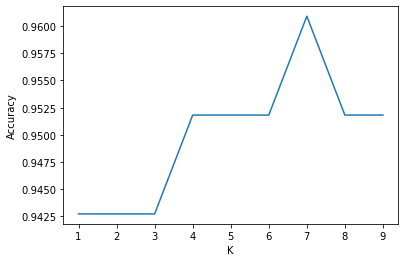

In [5]:
## KNN

from sklearn.neighbors import KNeighborsClassifier  #一个简单的模型，只有K一个参数，类似K-means
from sklearn.model_selection import train_test_split,cross_val_score	#划分数据 交叉验证

k_range = range(1,10) #k是投票人数
cv_scores = []		#用来放每个模型的结果值
for n in k_range:
    knn = KNeighborsClassifier(n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    scores = cross_val_score(knn,train_x,train_y,cv=10,scoring='accuracy')  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
    cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

In [6]:
best_knn = KNeighborsClassifier(n_neighbors=7)	# 选择最优的K=7传入模型
best_knn.fit(train_x,train_y)			#训练模型
print(best_knn.score(test_x,test_y))	#score = right/total = 44/45 = 0.9778(这里预测错了一个)
print(best_knn.predict(test_x))
print(test_y)

0.9777777777777777
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2]


## 4.优缺点

###### 4.1 优点
不需要训练、没有参数估计，拿到测试数据即可进行分类
###### 4.2 缺点
当样本中每种类型的数量不均衡时，可能会强行“少数服从多数”

###### 4.3验证一下缺点
- 这里使用Iris数据集和DryBean数据集
- 对这两个数据集进行数据清洗，生成每类样本数目均衡/不均衡的新数据集，比较KNN在“均衡Iris”、“不均衡Iris”、“均衡DryBean”、“不均衡DryBean”上的效果

In [7]:
#依旧是7:3划分数据集
#均衡Iris：7:3 = 105:45 = （33+34+38）：（17+16+12） （使用之前划分的数据集）
#不均衡Iris：7:3 = 105:45 = （45+45+15）：（5+5+35）
#均衡DryBean：7:3 = 1960:840 =（280*7）：（120*7）
#不均衡DryBean：7:3 = 1960:840 = (6:6:6:6:6:4:3) = 
#（318,318,318,318,318,212,159）：（68,91,136,136,136,136,136）

In [8]:
from numpy import *
i_train_x = train_x
i_train_y = train_y
i_test_x = test_x
i_test_y = test_y
ui_train_x = concatenate((concatenate((x[:45],x[50:95]),axis=0),x[100:115]),axis=0) #axis=0表示竖向拼接
ui_train_y = concatenate((concatenate((y[:45],y[50:95]),axis=0),y[100:115]),axis=0)
ui_test_x = concatenate((concatenate((x[:5],x[50:55]),axis=0),x[100:135]),axis=0)
ui_test_y = concatenate((concatenate((y[:5],y[50:55]),axis=0),y[100:135]),axis=0)

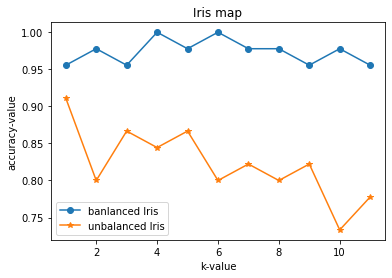

In [9]:
i_score = []
ui_score = []
klist = []
for k in range(1,12):  
    klist.append(k)
    i_knn = KNeighborsClassifier(n_neighbors=k)
    i_knn.fit(i_train_x,i_train_y)
    i_score.append(i_knn.score(i_test_x,i_test_y))
#     print("均衡Iris:",i_knn.score(i_test_x,i_test_y))
    ui_knn = KNeighborsClassifier(n_neighbors=k)
    ui_knn.fit(ui_train_x,ui_train_y)
    ui_score.append(ui_knn.score(ui_test_x,ui_test_y))
#     print("不均衡Iris:",i_knn.score(ui_test_x,ui_test_y))

plt.plot(klist, i_score, marker = 'o', label = 'banlanced Iris')
plt.plot(klist, ui_score,marker = '*', label = 'unbalanced Iris')
plt.legend() #让图例生效
plt.xlabel('k-value')
plt.ylabel('accuracy-value')
plt.title(u'Iris map')
plt.show()

In [10]:
# import openpyxl
import operator
from sklearn.preprocessing import StandardScaler  # 均值归一化
from sklearn.metrics import confusion_matrix  # 生成混淆矩阵
from sklearn.metrics import classification_report  # 分类报告

In [11]:
def openfile(filename):
    """
    打开数据集，进行数据处理
    :param filename:文件名
    :return:特征集数据、标签集数据
    """    
    # 打开excel
    sheet = pd.read_excel(filename,sheet_name='Dry_Beans_Dataset')
    
    data = sheet.iloc[:,:16].values
    target = sheet['Class'].values
    print(data.shape)
    print(target.shape)                                            
    return data, target, sheet.columns

In [12]:
def split_data_set(data_set, target_set, rate=0.7):
    """
    说明：分割数据集，默认数据集的30%是测试集

    :param data_set: 数据集
    :param target_set: 标签集
    :param rate: 测试集所占的比率
    :return: 返回训练集数据、训练集标签、测试集数据、测试集标签
    """
    # 计算训练集的数据个数
    train_size = len(data_set)
    # 随机获得数据的下标
    train_index = sorted(np.random.choice(train_size,round(train_size * rate), replace=False))
    test_index = sorted(np.array(list(set(range(train_size)) - set(train_index)))) #不用排序也行，强迫症，为了上面保持一致就排序了
    # 分割数据集（X表示数据，y表示标签）
    x_train = data_set.iloc[train_index,:] #因为这里的data_set和target_set变成DataFrame，而不是ndarray了，所以要用iloc访问
    x_test = data_set.iloc[test_index,:]
    y_train = target_set.iloc[train_index,:]
    y_test = target_set.iloc[test_index,:]
    return x_train, y_train, x_test, y_test

In [13]:
filename = r'D:\jjq\code\jupyterWorkSpace\datasets\DryBeanDataset\Dry_Bean_Dataset.xlsx'
o_bean_dataset = openfile(filename)
#每个类别的种子抽取400条数据，这个是每个类别的起始索引
step = 400
start_index = [0,1322,1844,3474,7020,8948,10975] #一共7类
# bean_dataset_x = pd.DataFrame(columns=o_bean_dataset[2])
# bean_dataset_y  =pd.DataFrame(columns=o_bean_dataset[2])
bean_dataset_x = pd.DataFrame(columns=range(16))
bean_dataset_y  =pd.DataFrame(columns=range(1))
bean_dataset_x.drop(bean_dataset_x.index,inplace=True)
bean_dataset_y.drop(bean_dataset_y.index,inplace=True)
for i in range(7):
    bean_dataset_x = pd.concat((bean_dataset_x, pd.DataFrame(o_bean_dataset[0][start_index[i]:(step+start_index[i])])),axis=0)
    bean_dataset_y = pd.concat((bean_dataset_y, pd.DataFrame(o_bean_dataset[1][start_index[i]:(step+start_index[i])])),axis=0)
# bean_dataset_y.to_excel("./123.xlsx")

(13611, 16)
(13611,)


In [14]:
#按照均衡和不均衡的方式，划分训练集和测试集

#均衡
b_train_x, b_train_y, b_test_x, b_test_y = split_data_set(bean_dataset_x,bean_dataset_y)
print(b_train_x.shape,b_train_y.shape)
print(b_test_x.shape,b_test_y.shape)
#不均衡
steps_train = [318,318,318,318,318,212,159]
steps_test = [68,91,136,136,136,136,136]
now = 0
#初始化不均衡数组
ub_train_x = pd.DataFrame(columns=range(16))
ub_test_x = pd.DataFrame(columns=range(16))
ub_train_y = pd.DataFrame(columns=range(1))
ub_test_y = pd.DataFrame(columns=range(1))
#保证添加数据之前数组为空
ub_train_x.drop(ub_train_x.index,inplace=True)
ub_test_x.drop(ub_test_x.index,inplace=True)
ub_train_y.drop(ub_train_y.index,inplace=True)
ub_test_y.drop(ub_test_y.index,inplace=True)

#开始添加数据
for i in range(7):
    ub_train_x = pd.concat((ub_train_x, bean_dataset_x[now:(now+steps_train[i])]),axis=0) 
    ub_train_y = pd.concat((ub_train_y, bean_dataset_y[now:(now+steps_train[i])]),axis=0)
    now = now+steps_train[i]
    ub_test_x = pd.concat((ub_test_x, bean_dataset_x[now:(now+steps_test[i])]),axis=0)
    ub_test_y = pd.concat((ub_test_y, bean_dataset_y[now:(now+steps_test[i])]),axis=0)
    now = now+steps_test[i]

(1960, 16) (1960, 1)
(840, 16) (840, 1)


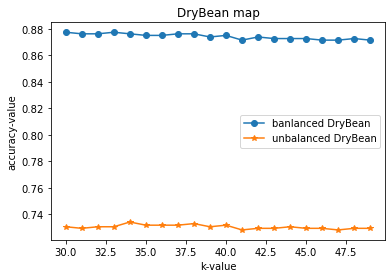

In [15]:
b_score = []
ub_score = []
klist = []
for k in range(30,50):  
    klist.append(k)
    b_knn = KNeighborsClassifier(n_neighbors=k)
    b_knn.fit(b_train_x,b_train_y.values.ravel())
    b_score.append(b_knn.score(b_test_x,b_test_y.values.ravel()))
    ub_knn = KNeighborsClassifier(n_neighbors=k)
    ub_knn.fit(ub_train_x,ub_train_y.values.ravel())
    ub_score.append(ub_knn.score(ub_test_x,ub_test_y.values.ravel()))

plt.plot(klist, b_score, marker = 'o', label = 'banlanced DryBean')
plt.plot(klist, ub_score,marker = '*', label = 'unbalanced DryBean')
plt.legend() #让图例生效
plt.xlabel('k-value')
plt.ylabel('accuracy-value')
plt.title(u'DryBean map')
plt.show()

## 4.实现代码

In [16]:
#这里放一下手动实现算法的代码，并且做到和调包的正确率一样
#采用Iris数据集作为计算样例

In [17]:
print(type(train_x))
print(pd.DataFrame(train_x).shape)
print(train_x[0][1])

<class 'numpy.ndarray'>
(105, 4)
0.41666666666666663


In [18]:
#定义KNN类，用于分类，类中定义两个预测方法，分为考虑权重不考虑权重两种情况
class KNN:
    ''' 使用Python语言实现K近邻算法。（实现分类） '''
    def __init__(self, k):
        '''初始化方法 
           Parameters
           -----
           k:int 邻居的个数
        '''
        self.k = k
    
    def fit(self,X,y):
        '''训练方法
            Parameters
            ----
            X : 类数组类型，形状为：[样本数量, 特征数量]
            待训练的样本特征（属性）
        
        y : 类数组类型，形状为： [样本数量]
            每个样本的目标值（标签）。
        '''
        #将X转换成ndarray数组
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型，形状为：[样本数量, 特征数量]
            待训练的样本特征（属性） 
        
        Returns
        -----
        result : 数组类型
            预测的结果。
        """
        X = np.asarray(X)
        result = []
        # 对ndarray数组进行遍历，每次取数组中的一行。
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求距离。
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            ## 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引。
            index = dis.argsort()
            # 进行截断，只取前k个元素。【取距离最近的k个元素的索引】
            index = index[:self.k]
            # 返回数组中每个元素出现的次数。元素必须是非负的整数。【使用weights考虑权重，权重为距离的倒数。】
            if dis[index].all()!=0:
                count = np.bincount(self.y[index], weights= 1 / dis[index])
            else :
                pass
            # 返回ndarray数组中，值最大的元素对应的索引。该索引就是我们判定的类别。
            # 最大元素索引，就是出现次数最多的元素。
            result.append(count.argmax())
        return np.asarray(result)

In [19]:
#创建KNN对象，进行训练与测试。
knn = KNN(k=7)
#进行训练
knn.fit(train_x,train_y)
#进行测试
result = knn.predict(test_x)
# display(result)
# display(test_y)
display(np.sum(result == test_y))
if len(result)!=0:
    display(np.sum(result == test_y)/ len(result))
#与调包结果一致

44

0.9777777777777777

## 5.scikit-learn中的kNN模型（source: CSDN Ada_Concentration）
- scikit-learn中提供了一个KNeighborClassifier类来实现k近邻法分类模型，其原型为：
sklearn.neighbors.KNighborClassifier(n_neighbors=5,weights=’uniform’,algorithm=’auto’,leaf_size=30,p=2,metric=’minkowski’,metric_params=None,n_jobs=1,**kwargs)

###### 5.1参数
- n_neighbors:一个整数，指定k值。
- weights:一字符串或者可调用对象，指定投票权重类型。也就是说这些邻居投票权可以为相同或不同：
-- ‘uniform’：本节点的所有邻居节点的投票权重都相等；
-- ‘distance’：本节点的所有邻居节点的投票权重与距离成反比，即越近的节点，其投票的权重越大；
-- [callable]：一个可调用对象。它传入距离的数组，返回同样形状的权重数组。
- algorithm:一个字符串，指定计算最近邻的算法，可以为如下：
-- ’ball_tree’ ：使用BallTree算法，也就是球树；
-- kd_tree’： 使用KDTree算法；
--‘brute’ ： 使用暴力搜素法；
--‘auto’ ： 自动决定最适合的算法。
- leaf_size:一个整数，指定BallTree或者KDTree叶节点的规模。它影响树的构建和查询速度。
- metric:一个字符串，指定距离度量。默认为‘minkowski’距离。
- p:整数值，指定在‘minkowski’距离上的指数。
- n_jobs：并行性。默认为-1表示派发任务到所有计算机的CPU上。

###### 5.2方法
- fit(X,y)：训练模型
- predict：使用模型来预测，返回待预测样本的标记。
- score(X,y)：返回在（X，y）上预测的准确率。
- predict_proba(X)：返回样本为每种标记的概率。
- kneighbors([X,n_neighbors,return_distance])：返回样本点的k近邻点。如果return_diatance=True,同时还返回到这些近邻点的距离。
- kneighbors_graph([X,n_neighbors,model])：返回样本点的连接图。

###### 5.3依赖关系
- 分类调用链
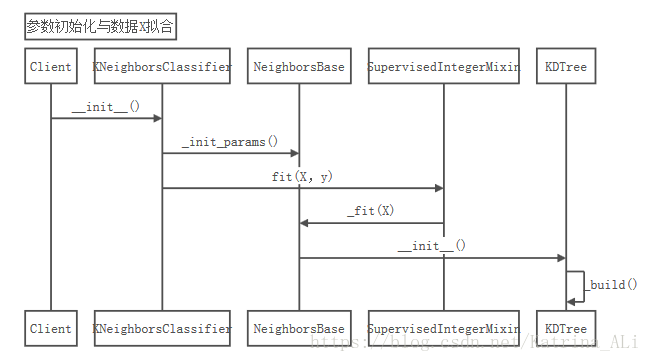

- 分类预测与打分
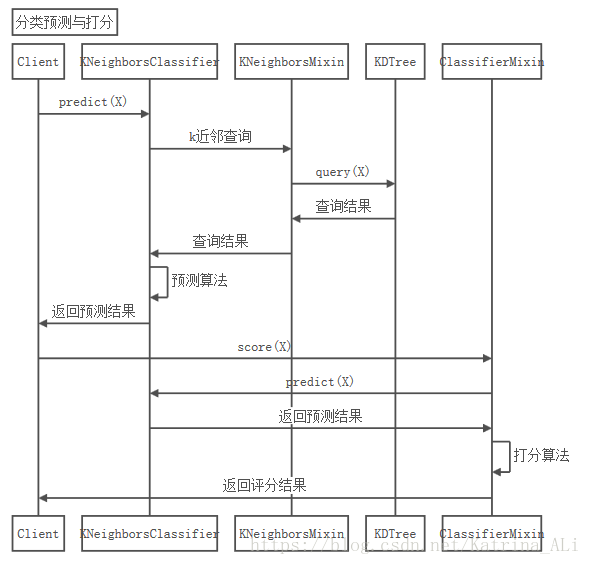

- 回归调用链
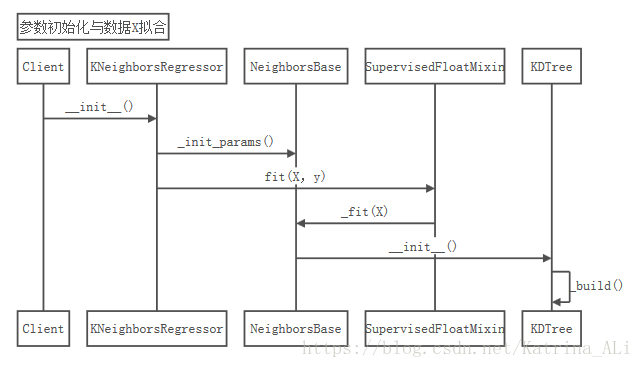

- 回归预测与打分
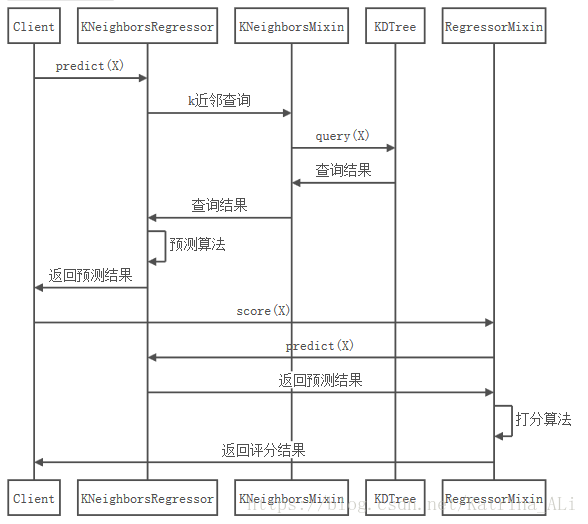

## 6.适用数据

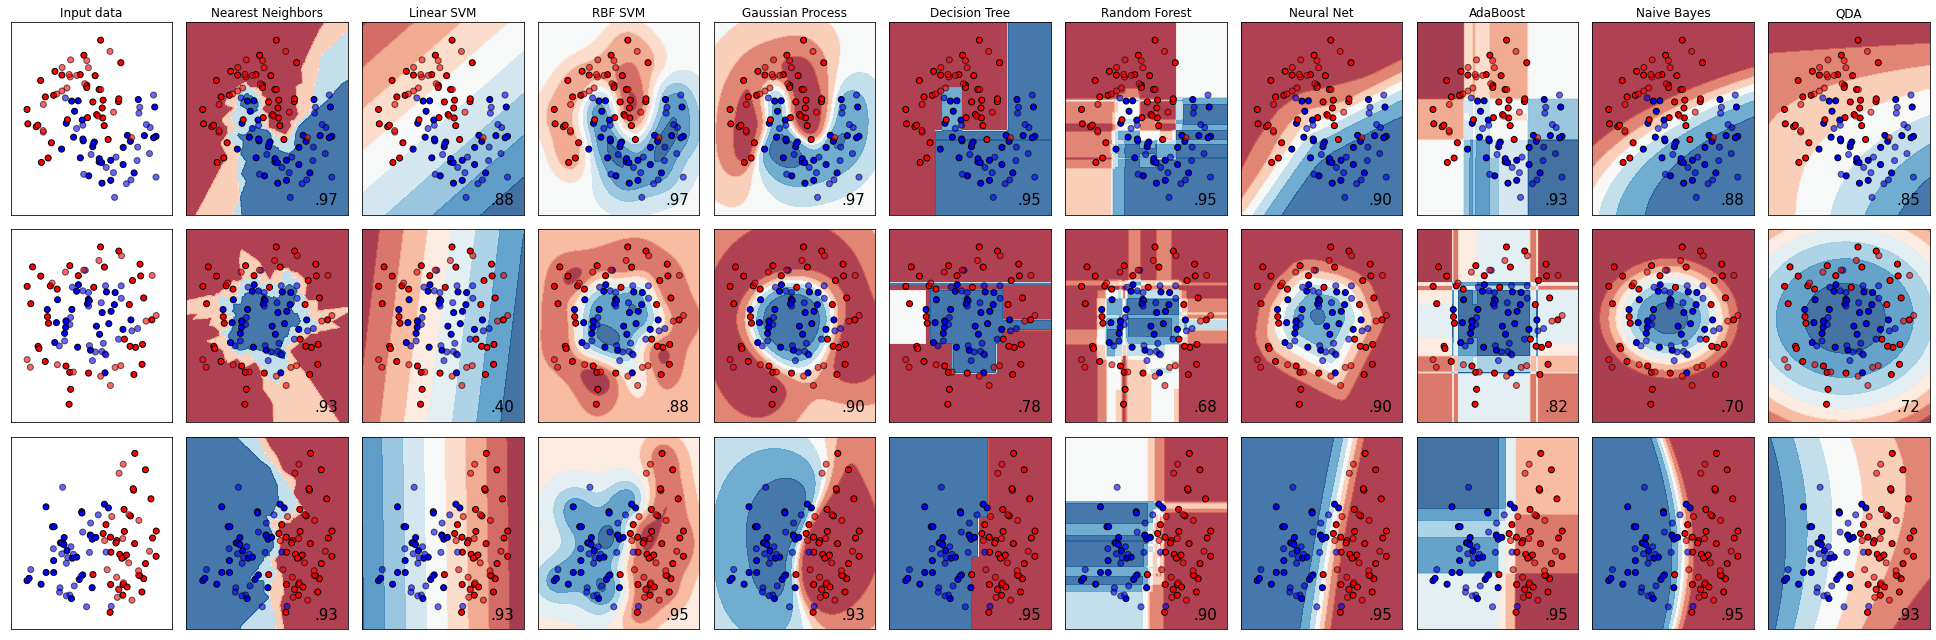

In [20]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()